# Imports

In [1]:
import numpy as np
import pandas as pd
import math

import os

import matplotlib.pyplot as plt

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Getting File Path

In [2]:
path = os.getcwd()
files = os.listdir(path)
print(files[-3])

newPath = path+'\\mergedCleanedCRDataset.csv'
print(newPath)

Random_Forest-Implementation.ipynb
C:\Users\nbadr\OneDrive - City St George's, University of London\Intro to AI\Project_IntroToAI\mergedCleanedCRDataset.csv


In [3]:
crDf = pd.read_csv(newPath,sep='\t')
crDf.head()

,Year,Month Num,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
1,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Other theft
2,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515659,51.408897,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Violence and sexual offences
3,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Violence and sexual offences
4,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Violence and sexual offences


# Label Encoding

Converting categorical columns into numerical ones

In [4]:
crEncDf = crDf.copy()

for i in crEncDf.columns:
    if not (i == 'Longitude' or i=='Latitude'):
        labEnc = LabelEncoder()
        crEncDf[i] = labEnc.fit_transform(crEncDf[i])

crEncDf.head()

,Year,Month Num,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,0,9,0,0,-2.492876,51.422716,246246,13087,1481,0
1,0,9,0,0,-2.491146,51.425008,160787,13087,1481,6
2,0,9,0,0,-2.515659,51.408897,45587,13087,1481,13
3,0,9,0,0,-2.491616,51.424619,133151,13087,1481,13
4,0,9,0,0,-2.492876,51.422716,246246,13087,1481,13


# Location Data Normalisation

Here we are normalising the Longitude and Latitude between a 0 to 1 scale, we may lose some data, but it ensures that it is easier for the models to process those columns

In [5]:
crScalDf = crEncDf.copy()

for i in crScalDf.columns:
    if (i == 'Longitude' or i=='Latitude'):
        minMaxScal = MinMaxScaler()
        crScalDf[i] = minMaxScal.fit_transform(crScalDf[i].to_numpy().reshape(-1,1)).flatten()

crScalDf.head()
        

,Year,Month Num,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,0,9,0,0,0.475959,0.259476,246246,13087,1481,0
1,0,9,0,0,0.476172,0.259865,160787,13087,1481,6
2,0,9,0,0,0.473152,0.257133,45587,13087,1481,13
3,0,9,0,0,0.476114,0.259799,133151,13087,1481,13
4,0,9,0,0,0.475959,0.259476,246246,13087,1481,13


# Train Test Split

Train Size is 70%
Test Size is 30% 
Random State is 16

Here we are limiting the number of rows, as SVC is a computationally inefficient model

Testing using hyperparameter tuning of Parameters

In [6]:
x = crScalDf.drop(columns='Crime type')
y = crScalDf['Crime type']

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.3,random_state=16)

xTrain = xTrain[:10000]
xTest = xTest[:10000]
yTrain = yTrain[:10000]
yTest = yTest[:10000]

## Creating a list of parameters to test

Did not include linear in Kernal as it only Precomputed for square matrix

In [8]:
svmParamsC = [0.75,0.8,0.9,1.0,1.1,1.2,1.25]
svmParamsKer = ['poly','rbf','sigmoid']
svmParamsDeg = [1,2,3,4,5]
svmParamsGam = ['scale','auto']
svmParamsBreakTies = [ False, True ]
svmParamsDFS = ['ovo','ovr']
svmModelArr = []
svmModelParams = []
accList = []

In [9]:
#Src: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

for h in svmParamsDFS:
    for i in svmParamsC:
        for j in svmParamsBreakTies:
            for k in svmParamsKer:
                if k == 'poly':
                    for l in svmParamsDeg:
                        svmTemp = SVC(C=i,kernel=k,degree=l,break_ties=j,decision_function_shape=h,verbose=True)
                        svmModelArr.append(svmTemp)
                        svmModelParams.append([i,j,k,l,h])
                else:
                    for l in svmParamsGam:
                        svmTemp = SVC(C=i,kernel=k,gamma=l,break_ties=j,decision_function_shape=h,verbose=True)
                        svmModelArr.append(svmTemp)
                        svmModelParams.append([i,j,k,l,h])

In [10]:
for i in svmModelArr:
    print(i)

SVC(C=0.75, decision_function_shape='ovo', degree=1, kernel='poly',
    verbose=True)
SVC(C=0.75, decision_function_shape='ovo', degree=2, kernel='poly',
    verbose=True)
SVC(C=0.75, decision_function_shape='ovo', kernel='poly', verbose=True)
SVC(C=0.75, decision_function_shape='ovo', degree=4, kernel='poly',
    verbose=True)
SVC(C=0.75, decision_function_shape='ovo', degree=5, kernel='poly',
    verbose=True)
SVC(C=0.75, decision_function_shape='ovo', verbose=True)
SVC(C=0.75, decision_function_shape='ovo', gamma='auto', verbose=True)
SVC(C=0.75, decision_function_shape='ovo', kernel='sigmoid', verbose=True)
SVC(C=0.75, decision_function_shape='ovo', gamma='auto', kernel='sigmoid',
    verbose=True)
SVC(C=0.75, break_ties=True, decision_function_shape='ovo', degree=1,
    kernel='poly', verbose=True)
SVC(C=0.75, break_ties=True, decision_function_shape='ovo', degree=2,
    kernel='poly', verbose=True)
SVC(C=0.75, break_ties=True, decision_function_shape='ovo', kernel='poly',
    ver

In [11]:
for j in svmModelArr:
    print(j)
    j.fit(xTrain,yTrain)


SVC(C=0.75, decision_function_shape='ovo', degree=1, kernel='poly',
    verbose=True)
[LibSVM]SVC(C=0.75, decision_function_shape='ovo', degree=2, kernel='poly',
    verbose=True)
[LibSVM]SVC(C=0.75, decision_function_shape='ovo', kernel='poly', verbose=True)
[LibSVM]SVC(C=0.75, decision_function_shape='ovo', degree=4, kernel='poly',
    verbose=True)
[LibSVM]SVC(C=0.75, decision_function_shape='ovo', degree=5, kernel='poly',
    verbose=True)
[LibSVM]SVC(C=0.75, decision_function_shape='ovo', verbose=True)
[LibSVM]SVC(C=0.75, decision_function_shape='ovo', gamma='auto', verbose=True)
[LibSVM]SVC(C=0.75, decision_function_shape='ovo', kernel='sigmoid', verbose=True)
[LibSVM]SVC(C=0.75, decision_function_shape='ovo', gamma='auto', kernel='sigmoid',
    verbose=True)
[LibSVM]SVC(C=0.75, break_ties=True, decision_function_shape='ovo', degree=1,
    kernel='poly', verbose=True)
[LibSVM]SVC(C=0.75, break_ties=True, decision_function_shape='ovo', degree=2,
    kernel='poly', verbose=True)
[L

## Printing model with their accuracy

we can observe that when the kernel is sigmoid and gamma is not in auto mode, there is a sharp drop in the accuracy (0.35 to 0.2418). Regularization parameter does not affect the same.

This indicates that Variance of X affects the model negatively when run using sigmoid kernel, Since:

Gamma = Scale => 1 / (n_features * X.var())

Gamma = Auto => 1 / n_features

--

Furthermore, if there is a value error intercepted due to incompatibility of some parameters, we will consider their accuracy to be 0

In [14]:
for i in svmModelArr:
    try:
        print(i)
        yPred = i.predict(xTest)
        acc = accuracy_score(yTest,yPred)
        print(acc)
    except ValueError as e:
        accList.append(0)
        continue
    
    accList.append(acc)

SVC(C=0.75, decision_function_shape='ovo', degree=1, kernel='poly',
    verbose=True)
0.35
SVC(C=0.75, decision_function_shape='ovo', degree=2, kernel='poly',
    verbose=True)
0.35
SVC(C=0.75, decision_function_shape='ovo', kernel='poly', verbose=True)
0.35
SVC(C=0.75, decision_function_shape='ovo', degree=4, kernel='poly',
    verbose=True)
0.35
SVC(C=0.75, decision_function_shape='ovo', degree=5, kernel='poly',
    verbose=True)
0.35
SVC(C=0.75, decision_function_shape='ovo', verbose=True)
0.35
SVC(C=0.75, decision_function_shape='ovo', gamma='auto', verbose=True)
0.351
SVC(C=0.75, decision_function_shape='ovo', kernel='sigmoid', verbose=True)
0.237
SVC(C=0.75, decision_function_shape='ovo', gamma='auto', kernel='sigmoid',
    verbose=True)
0.35
SVC(C=0.75, break_ties=True, decision_function_shape='ovo', degree=1,
    kernel='poly', verbose=True)
SVC(C=0.75, break_ties=True, decision_function_shape='ovo', degree=2,
    kernel='poly', verbose=True)
SVC(C=0.75, break_ties=True, decisi

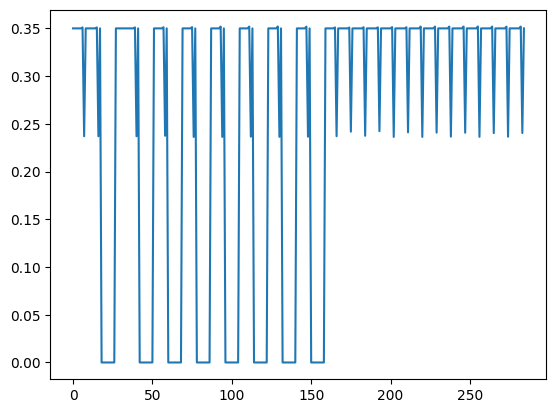

In [17]:
plt.plot(accList)